In [ ]:
# ideas:
# clip the left and the right!
# expand the left and the right
# pad top and bottom
# varying level of uniform and Gaussian noise
# splotches
# shrink/expand whitespace in the middle
# thicken strokes

In [2]:
import numpy as np
from PIL import Image
from bs4 import BeautifulSoup
from scipy.ndimage.filters import correlate, convolve
import matplotlib.pyplot as plt
import time

In [ ]:
import cairosvg
import io

def svgRead(filename):
    """Load an SVG file and return image in Numpy array"""
    # Make memory buffer
    mem = io.BytesIO()
    # Convert SVG to PNG in memory
    cairosvg.svg2png(url=filename, write_to=mem)
    # Convert PNG to Numpy array
    return np.array(Image.open(mem))

# Read SVG file into Numpy array
res = svgRead('sample_score-1.svg')

In [26]:
with open('sample_score-1.svg') as f:
    s = str(f.read())
    soup = BeautifulSoup(s, 'xml')
    
svg_tag = soup.find('svg')
svg_tag.attrs['xmlns'] = svg_tag.attrs['xmlns:']
del svg_tag.attrs['xmlns:']

for tag in soup.find_all():
    if 'stroke-width' in tag.attrs:
        stroke_width = float(tag['stroke-width'])
        stroke_width *= 2
        tag['stroke-width'] = str(stroke_width)
        
with open('sample_score-1_modified.svg', 'w+') as f:
    f.write(str(soup))

In [48]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
k = np.array([[1, 1, 1], [1, 1, 0] ,[1, 0, 0]])
print(convolve(a, k, mode='constant'))

[[14 23 28 19]
 [32 46 52 31]
 [25 28 31 12]]


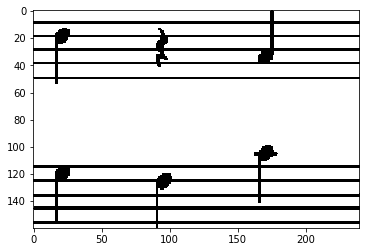

In [5]:
# thicken strokes 'by hand'
image_data = np.load('partial_image_data_160_240.npy')
a = image_data[0]/255

b = np.zeros_like(a)
a = np.pad(a, 1)
for i in range(160):
    for j in range(240):
        b[i, j] += np.min([a[i:i+2, j:j+2].sum(), 1])
        
b = np.around(b)
plt.imshow(b, cmap='bone_r')
b = (1 - b)*255
image = Image.fromarray(b).convert('RGB')
image.save('sample_image_modified.png')

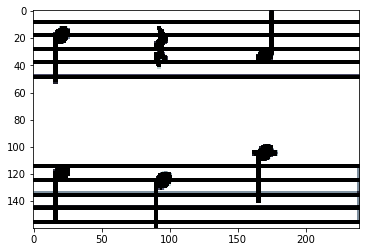

In [116]:
a = image_data[0]/255
k = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
b = correlate(a, k, mode='constant')
b = np.minimum(b, 1)
plt.imshow(b, cmap='bone_r')

In [137]:
image = image_data[0]
image = np.pad(image, ((100, 11), (0, 0)))
image = 255-image
image = Image.fromarray(image)
image = image.convert('1')
image = image.resize((240, 240))
image.save('sample_image3.png')

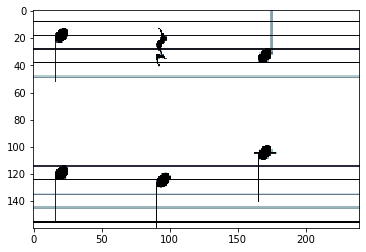

In [144]:
image = image_data[0]
plt.imshow(image, cmap='bone_r')
image = 255-image
image = Image.fromarray(image)
image = image.convert('1')
image.save('sample_image3.png')

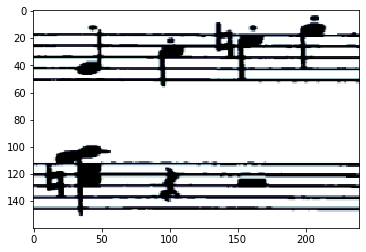

In [24]:
def rgb_to_grayscale(x):
    # x is an numpy array with shape (a, b, 3)
    a, b, _ = x.shape
    weights = np.array([[0.2125, 0.7154, 0.0721]]).T
    return (x @ weights).reshape(a, b)

image = Image.open('Beethoven_Clean.PNG')
image = image.resize((240, 160))
image_np = np.array(image)
image_np = image_np[:, :, :3]
image_np = rgb_to_grayscale(image_np)
plt.imshow(image_np, cmap='bone')

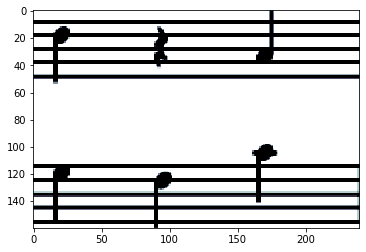

In [21]:
a = image_data[0]/255
k = 0.5*np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
b = correlate(a, k, mode='constant')
b = np.minimum(b, 1)
plt.imshow(b, cmap='bone_r')

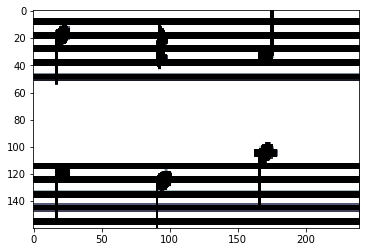

In [31]:
a = image_data[0]/255
k = np.ones((5, 2))
b = correlate(a, k, mode='constant')
b = np.minimum(b, 1)
plt.imshow(b, cmap='bone_r')

(0, 25)

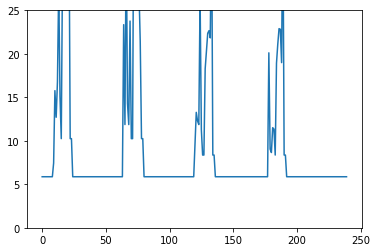

In [67]:
n = np.random.randint(x.shape[0])
x = image_data[n]/255
column_averages = x.sum(axis=0)
lower_bound = 3/8
upper_bound = 5/8
white_rows = np.where(column_averages == 0)
plt.plot(column_averages)
plt.ylim(0, 25)

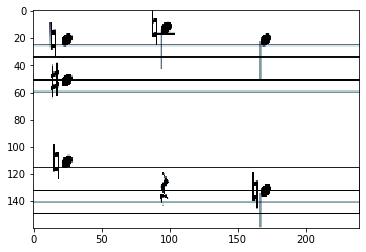

In [64]:
plt.imshow(x, cmap='bone_r')